In [858]:
#Hda Taha AL-Rimawi     0195617
#Nour Dar_Hamda       0185869 

### Final Project : Pistachio types detection

## Import libraries


In [859]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler
from pandas.plotting import scatter_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.compose import ColumnTransformer
from sklearn import ensemble
from sklearn.preprocessing import FunctionTransformer
from sklearn.dummy import DummyClassifier
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import roc_curve
import matplotlib.patches as patches
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

### Import Data from pistachio.csv file


In [861]:
#reading data
data =pd.read_csv(r"C:\Users\NOR0185869\Downloads\archive\pistachio.csv")

In [862]:
data

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0     73107  1161.8070    442.4074    217.7261        0.8705  305.0946   
1     89272  1173.1810    460.2551    251.9546        0.8369  337.1419   
2     60955   999.7890    386.9247    209.1255        0.8414  278.5863   
3     79537  1439.5129    466.7973    221.2136        0.8806  318.2289   
4     96395  1352.6740    515.8730    246.5945        0.8784  350.3340   
...     ...        ...         ...         ...           ...       ...   
1713  65570  2071.4451    418.0258    217.1458        0.8545  288.9400   
1714  68849  1441.2590    451.0457    205.2553        0.8905  296.0764   
1715  90270  1370.5380    428.9636    269.8232        0.7774  339.0211   
1716  73148  1309.8430    469.0491    208.3141        0.8960  305.1801   
1717  78780  1324.8831    451.5905    239.3016        0.8481  316.7109   

      SOLIDITY  CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
0       0.9424        77579  0.7710        2.0319     0.6806       0.6896   
1       0.9641        92598  0.7584        1.8267     0.8151       0.7325   
2       0.9465        64400  0.7263        1.8502     0.7663       0.7200   
3       0.9437        84281  0.7568        2.1102     0.4823       0.6817   
4       0.9549       100950  0.7428        2.0920     0.6620       0.6791   
...        ...          ...     ...           ...        ...          ...   
1713    0.8976        73054  0.5945        1.9251     0.1920       0.6912   
1714    0.9340        73716  0.6459        2.1975     0.4165       0.6564   
1715    0.9722        92847  0.7400        1.5898     0.6039       0.7903   
1716    0.9376        78014  0.6341        2.2516     0.5358       0.6506   
1717    0.9328        84454  0.7021        1.8871     0.5640       0.7013   

      SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4  \
0            0.0061         0.0030         0.4756         0.9664   
1            0.0052         0.0028         0.5366         0.9802   
2            0.0063         0.0034         0.5184         0.9591   
3            0.0059         0.0028         0.4648         0.9807   
4            0.0054         0.0026         0.4612         0.9648   
...             ...            ...            ...            ...   
1713         0.0064         0.0033         0.4778         0.9197   
1714         0.0066         0.0030         0.4309         0.9469   
1715         0.0048         0.0030         0.6246         0.9930   
1716         0.0064         0.0028         0.4233         0.9532   
1717         0.0057         0.0030         0.4919         0.9282   

                  Class  
0     Kirmizi_Pistachio  
1        Siit_Pistachio  
2     Kirmizi_Pistachio  
3     Kirmizi_Pistachio  
4     Kirmizi_Pistachio  
...                 ...  
1713  Kirmizi_Pistachio  
1714  Kirmizi_Pistachio  
1715     Siit_Pistachio  
1716  Kirmizi_Pistachio  
1717     Siit_Pistachio  

[1718 rows x 17 columns]

## Take a look on the Data

##### Displaying the first 10 rows in pistachio Data :

In [863]:
data.head(10)

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  73107  1161.8070    442.4074    217.7261        0.8705  305.0946    0.9424   
1  89272  1173.1810    460.2551    251.9546        0.8369  337.1419    0.9641   
2  60955   999.7890    386.9247    209.1255        0.8414  278.5863    0.9465   
3  79537  1439.5129    466.7973    221.2136        0.8806  318.2289    0.9437   
4  96395  1352.6740    515.8730    246.5945        0.8784  350.3340    0.9549   
5  74065  1380.5500    405.4317    245.2286        0.7963  307.0871    0.9041   
6  91533  1915.9561    451.7373    267.9266        0.8051  341.3846    0.9395   
7  77803  2034.9950    455.4354    270.3713        0.8047  314.7409    0.7967   
8  90992  1185.5310    468.9019    249.6060        0.8465  340.3742    0.9883   
9  83311  1208.8810    473.0142    228.6437        0.8754  325.6913    0.9687   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  \
0        77579  0.7710        2.0319     0.6806       0.6896         0.0061   
1        92598  0.7584        1.8267     0.8151       0.7325         0.0052   
2        64400  0.7263        1.8502     0.7663       0.7200         0.0063   
3        84281  0.7568        2.1102     0.4823       0.6817         0.0059   
4       100950  0.7428        2.0920     0.6620       0.6791         0.0054   
5        81920  0.7251        1.6533     0.4883       0.7574         0.0055   
6        97432  0.7333        1.6860     0.3133       0.7557         0.0049   
7        97652  0.6716        1.6845     0.2361       0.6911         0.0059   
8        92072  0.7601        1.8786     0.8136       0.7259         0.0052   
9        86004  0.7708        2.0688     0.7164       0.6885         0.0057   

   SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4              Class  
0         0.0030         0.4756         0.9664  Kirmizi_Pistachio  
1         0.0028         0.5366         0.9802     Siit_Pistachio  
2         0.0034         0.5184         0.9591  Kirmizi_Pistachio  
3         0.0028         0.4648         0.9807  Kirmizi_Pistachio  
4         0.0026         0.4612         0.9648  Kirmizi_Pistachio  
5         0.0033         0.5737         0.9485  Kirmizi_Pistachio  
6         0.0029         0.5711         0.9629     Siit_Pistachio  
7         0.0035         0.4776         0.8045  Kirmizi_Pistachio  
8         0.0027         0.5269         0.9899     Siit_Pistachio  
9         0.0027         0.4741         0.9808  Kirmizi_Pistachio

In [864]:
#the columns in the data set
data_columns = data.columns
print(data_columns)

Index(['AREA', 'PERIMETER', 'MAJOR_AXIS', 'MINOR_AXIS', 'ECCENTRICITY',
       'EQDIASQ', 'SOLIDITY', 'CONVEX_AREA', 'EXTENT', 'ASPECT_RATIO',
       'ROUNDNESS', 'COMPACTNESS', 'SHAPEFACTOR_1', 'SHAPEFACTOR_2',
       'SHAPEFACTOR_3', 'SHAPEFACTOR_4', 'Class'],
      dtype='object')


In [865]:
data.shape

(1718, 17)

#### To get a quick description of the data:

In [866]:
#This method show us the information about the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1718 entries, 0 to 1717
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   AREA           1718 non-null   int64  
 1   PERIMETER      1718 non-null   float64
 2   MAJOR_AXIS     1718 non-null   float64
 3   MINOR_AXIS     1718 non-null   float64
 4   ECCENTRICITY   1718 non-null   float64
 5   EQDIASQ        1718 non-null   float64
 6   SOLIDITY       1718 non-null   float64
 7   CONVEX_AREA    1718 non-null   int64  
 8   EXTENT         1718 non-null   float64
 9   ASPECT_RATIO   1718 non-null   float64
 10  ROUNDNESS      1718 non-null   float64
 11  COMPACTNESS    1718 non-null   float64
 12  SHAPEFACTOR_1  1718 non-null   float64
 13  SHAPEFACTOR_2  1718 non-null   float64
 14  SHAPEFACTOR_3  1718 non-null   float64
 15  SHAPEFACTOR_4  1718 non-null   float64
 16  Class          1718 non-null   object 
dtypes: float64(14), int64(2), object(1)
memory usage: 22

By using .info() can help us know how many null values are in each column and as we can see that there is no null values in the pistachio Dataset.

##### .describe( ) method shows a summary of categorical and numerical attributes. Numerical attributes summary differs from the summary of categorical attributes.

In [867]:
data.describe()

AREA    PERIMETER   MAJOR_AXIS   MINOR_AXIS  ECCENTRICITY  \
count    1718.000000  1718.000000  1718.000000  1718.000000   1718.000000   
mean    79871.952852  1421.797588   446.206444   238.193128      0.840347   
std     12968.217051   373.408835    31.885328    30.426445      0.049026   
min     29808.000000   858.363000   321.425500   133.509600      0.504900   
25%     71898.500000  1169.633225   426.554100   217.875475      0.817500   
50%     79795.000000  1260.785500   448.453150   235.888750      0.850250   
75%     88980.000000  1599.479000   467.515200   257.433625      0.875375   
max    124008.000000  2755.049100   535.642200   383.046100      0.946000   

           EQDIASQ     SOLIDITY    CONVEX_AREA       EXTENT  ASPECT_RATIO  \
count  1718.000000  1718.000000    1718.000000  1718.000000   1718.000000   
mean    317.790000     0.940103   84947.671129     0.716055      1.899342   
std      26.571699     0.050006   13081.742551     0.052534      0.241253   
min     194.814600     0.588000   37935.000000     0.427200      1.158500   
25%     302.562375     0.920250   76357.750000     0.688100      1.736325   
50%     318.744650     0.953800   84973.000000     0.726100      1.899550   
75%     336.590000     0.976300   93660.750000     0.753600      2.068575   
max     397.356100     0.995100  132478.000000     0.820400      3.085800   

         ROUNDNESS  COMPACTNESS  SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  \
count  1718.000000  1718.000000    1718.000000    1718.000000    1718.000000   
mean      0.570831     0.712841       0.005704       0.003017       0.510097   
std       0.211514     0.044230       0.000810       0.000334       0.063391   
min       0.062800     0.476000       0.004000       0.002400       0.226600   
25%       0.372325     0.682000       0.005200       0.002800       0.465125   
50%       0.643850     0.709750       0.005600       0.003000       0.503750   
75%       0.744450     0.741600       0.006100       0.003200       0.549975   
max       0.933600     0.869500       0.013100       0.005300       0.756100   

       SHAPEFACTOR_4  
count    1718.000000  
mean        0.955185  
std         0.051735  
min         0.620400  
25%         0.944200  
50%         0.972800  
75%         0.986800  
max         0.999000

##### We can use .value_counts() to find categories and repetitions of any column:

In [868]:
#the count for each element in Class
data["Class"].value_counts()

Kirmizi_Pistachio    998
Siit_Pistachio       720
Name: Class, dtype: int64

##### Using .describe() with categorical attribues :

In [869]:
data["Class"].describe()

count                  1718
unique                    2
top       Kirmizi_Pistachio
freq                    998
Name: Class, dtype: object

## Data Visualisation

Bellow is a pie plot that shows the percentage of the two classes in the Category column:

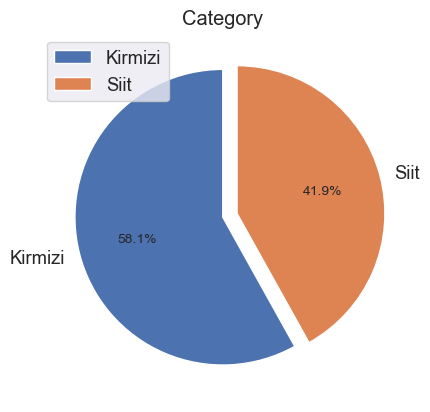

In [870]:
x = data["Class"].value_counts()
values = [x.Kirmizi_Pistachio,x.Siit_Pistachio]
Ans= ['Kirmizi','Siit']
plt.pie(values,labels = Ans,autopct = '%1.1f%%',startangle=90,explode =(0,.1)) 
plt.legend(loc='upper left')
plt.title('Category')
plt.show()

Presenting each numerical column in a histogram:

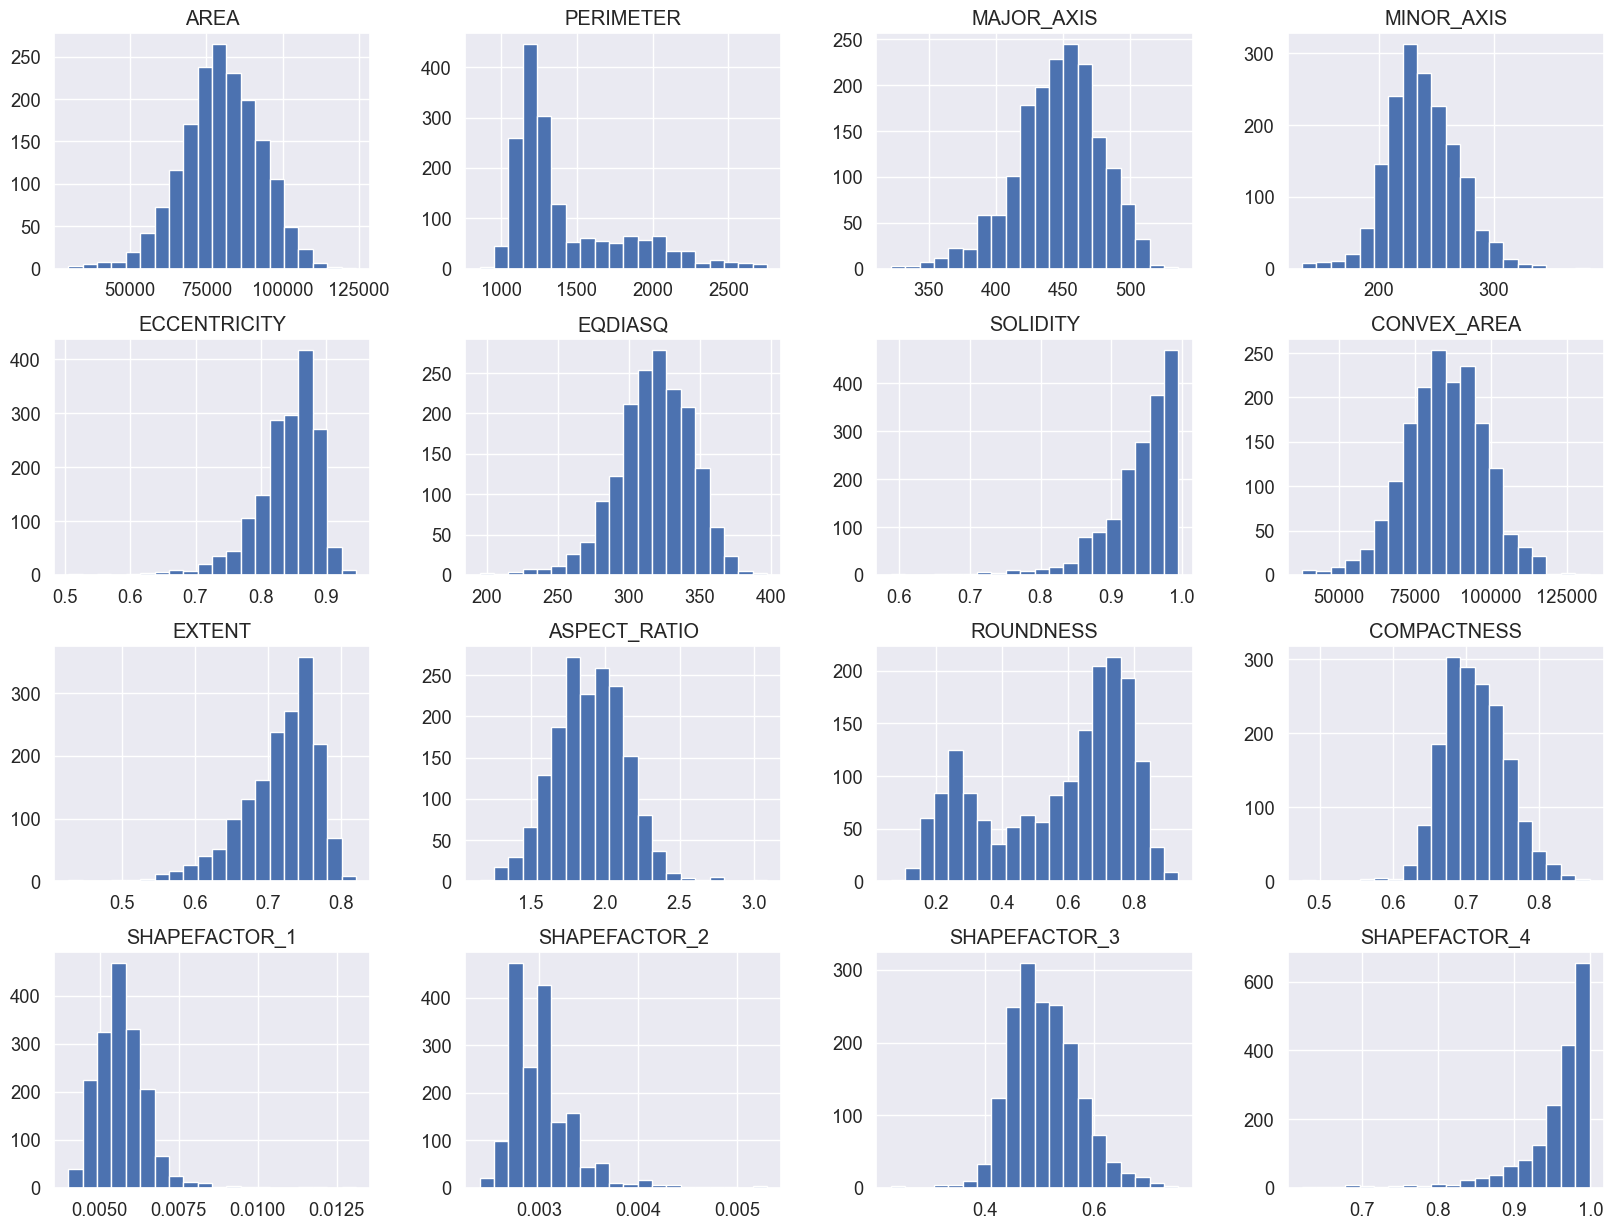

In [871]:
#Histogram plot
%matplotlib inline
import matplotlib.pyplot as plt
data.hist(bins=20, figsize=(20,15))
plt.show()

Presenting categorical column in a histogram:

<function matplotlib.pyplot.show(close=None, block=None)>

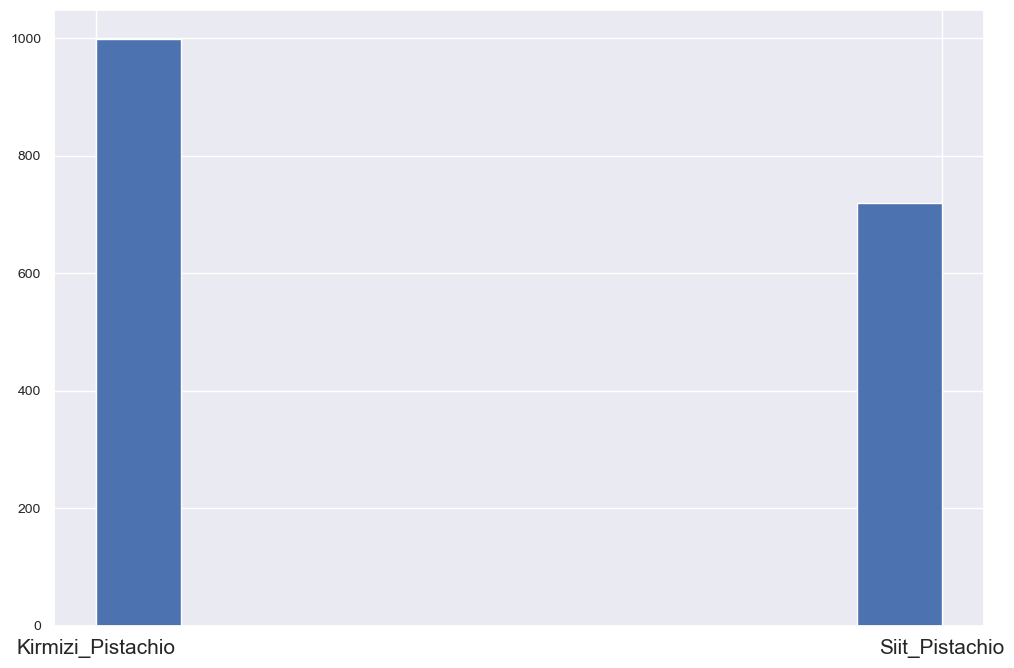

In [872]:
plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=10)
data['Class'].hist(figsize = (12,8))
plt.show

## - Looking for Correlations


In [873]:
#Encoder Class column labels
data['Class'] = data['Class'].map({'Siit_Pistachio': 1, 'Kirmizi_Pistachio': 0})


In [874]:
corr_matrix =data.corr()
corr_matrix["Class"].sort_values(ascending=False)

Class            1.000000
MINOR_AXIS       0.665448
SHAPEFACTOR_3    0.622338
COMPACTNESS      0.619811
AREA             0.595600
CONVEX_AREA      0.590318
EQDIASQ          0.583801
PERIMETER        0.152467
MAJOR_AXIS       0.146272
SOLIDITY         0.119166
ROUNDNESS        0.104833
EXTENT           0.102370
SHAPEFACTOR_4    0.054388
SHAPEFACTOR_2   -0.128851
ECCENTRICITY    -0.540754
ASPECT_RATIO    -0.572485
SHAPEFACTOR_1   -0.615350
Name: Class, dtype: float64

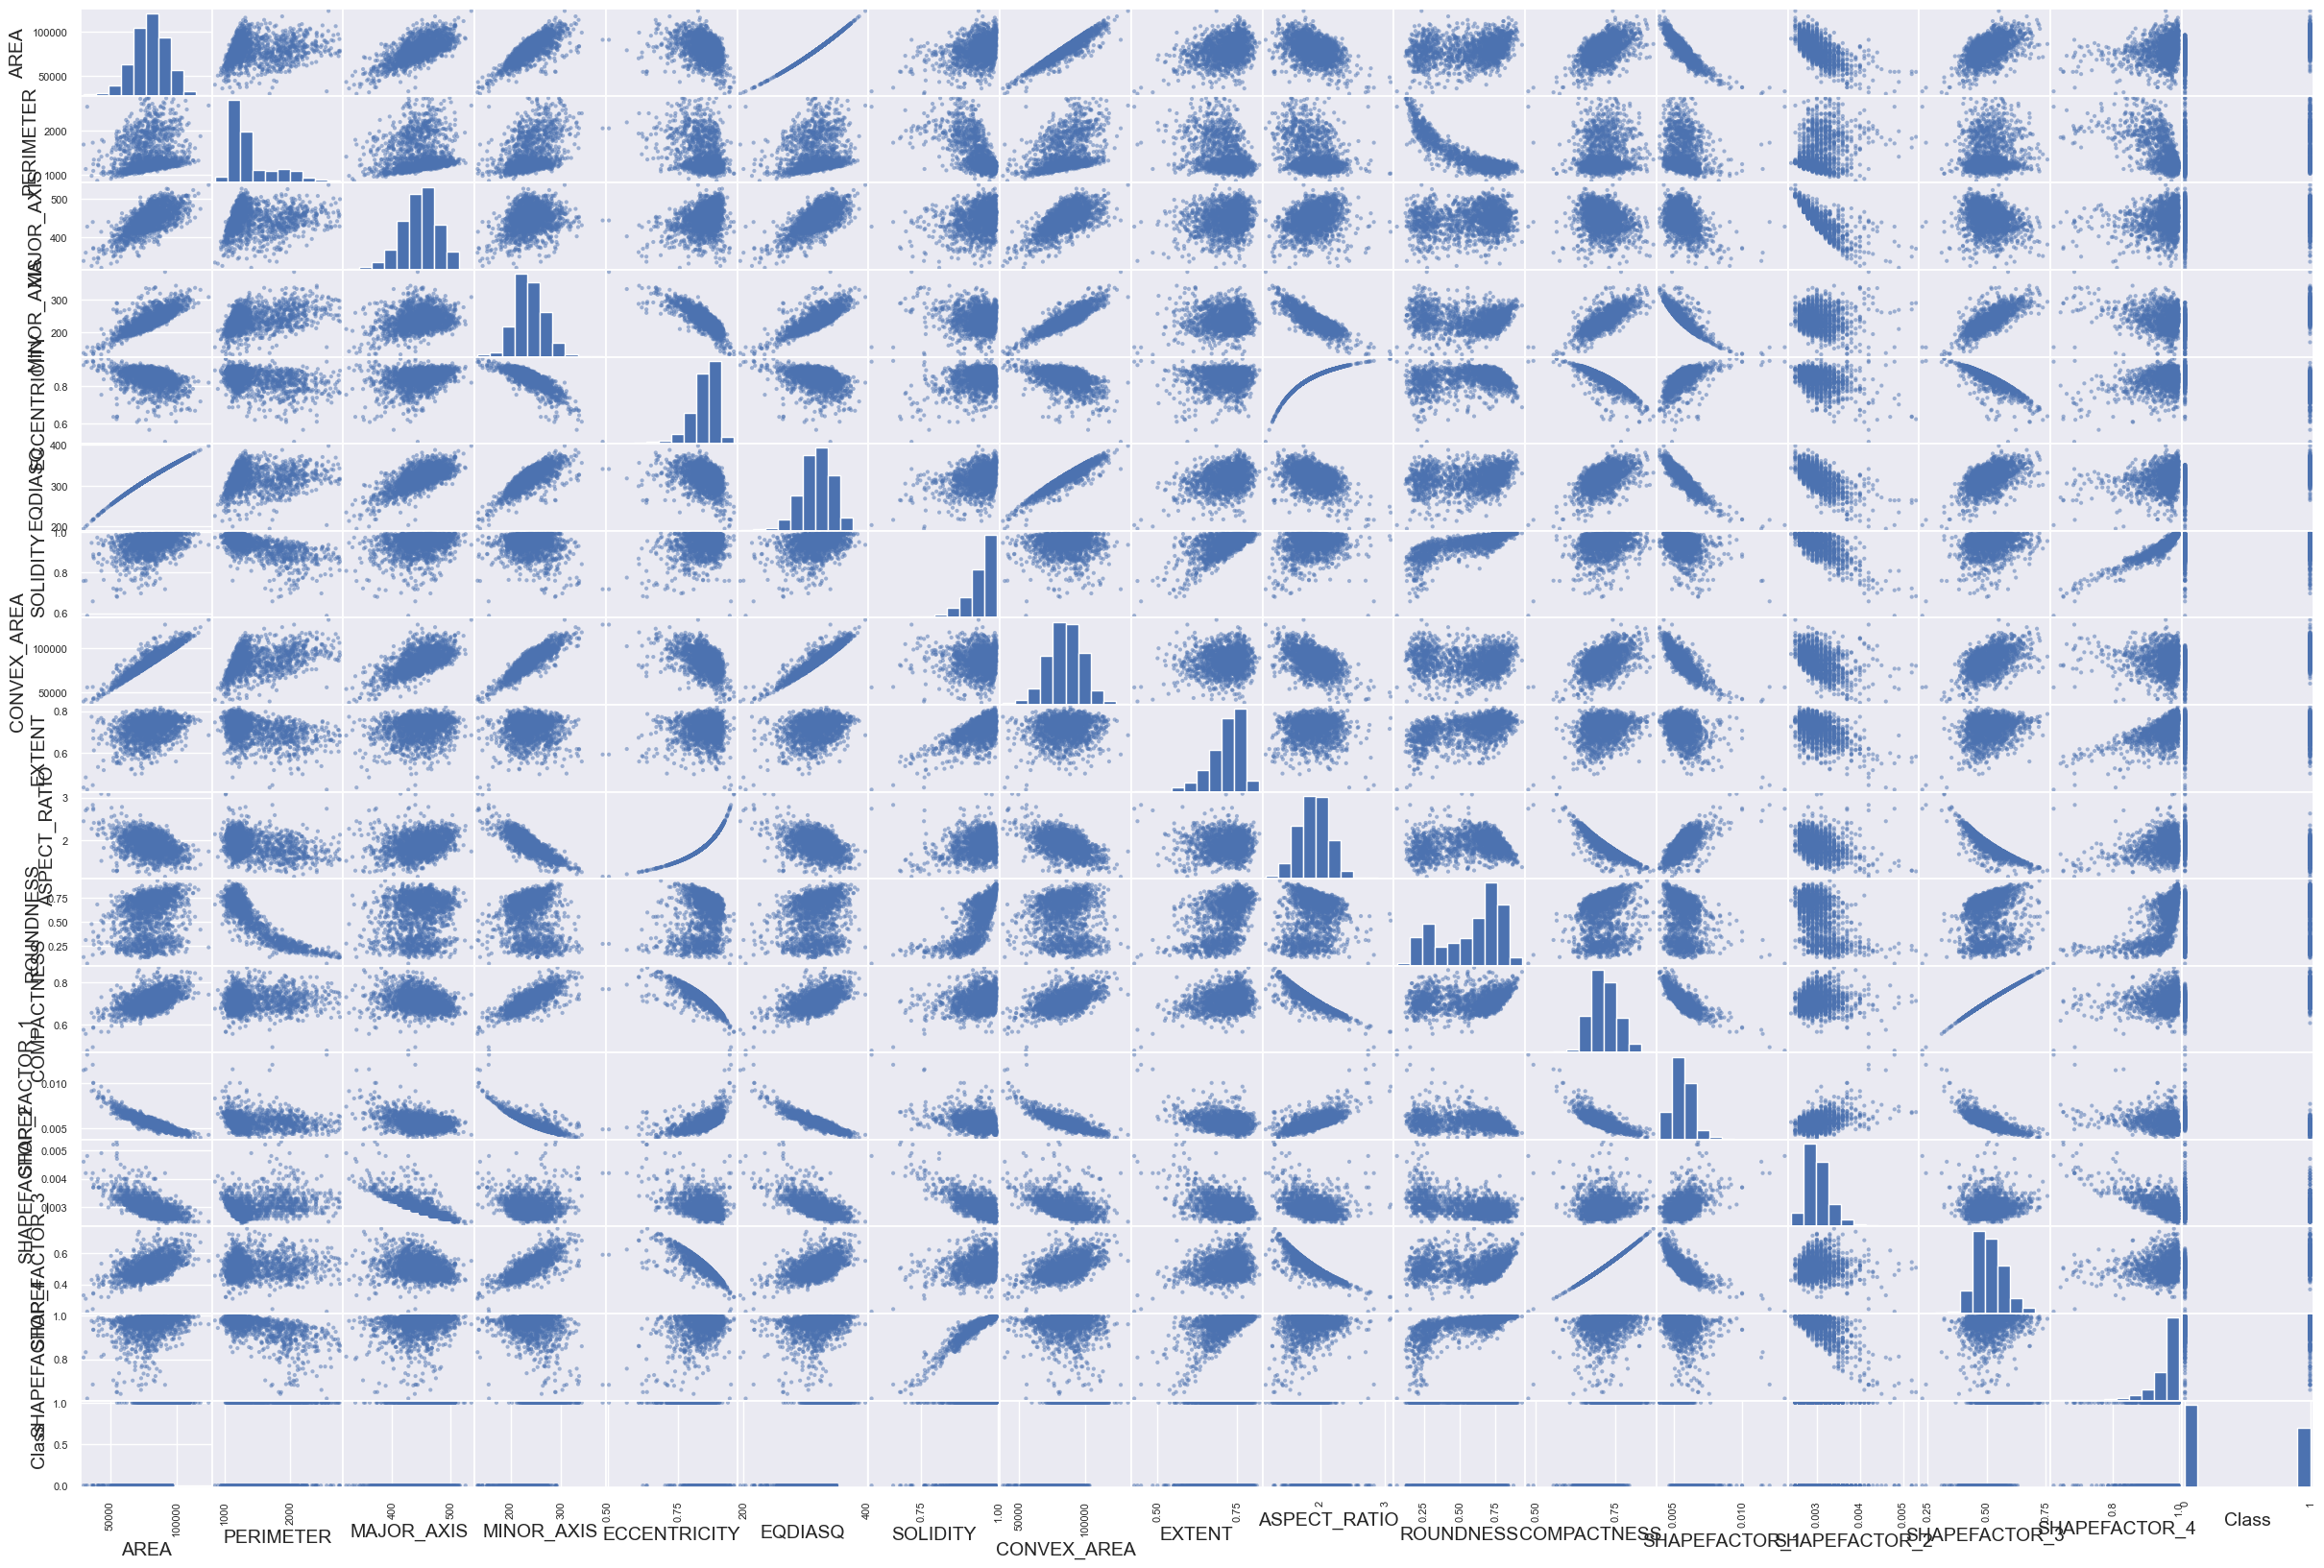

In [875]:
attributes = ["AREA", "PERIMETER", "MAJOR_AXIS",
              "MINOR_AXIS","ECCENTRICITY","EQDIASQ",'SOLIDITY','CONVEX_AREA','EXTENT','ASPECT_RATIO','ROUNDNESS','COMPACTNESS','SHAPEFACTOR_1','SHAPEFACTOR_2','SHAPEFACTOR_3','SHAPEFACTOR_4','Class']
subset_data= data[attributes]
pd.plotting.scatter_matrix(subset_data, figsize=(30, 20))
plt.show()



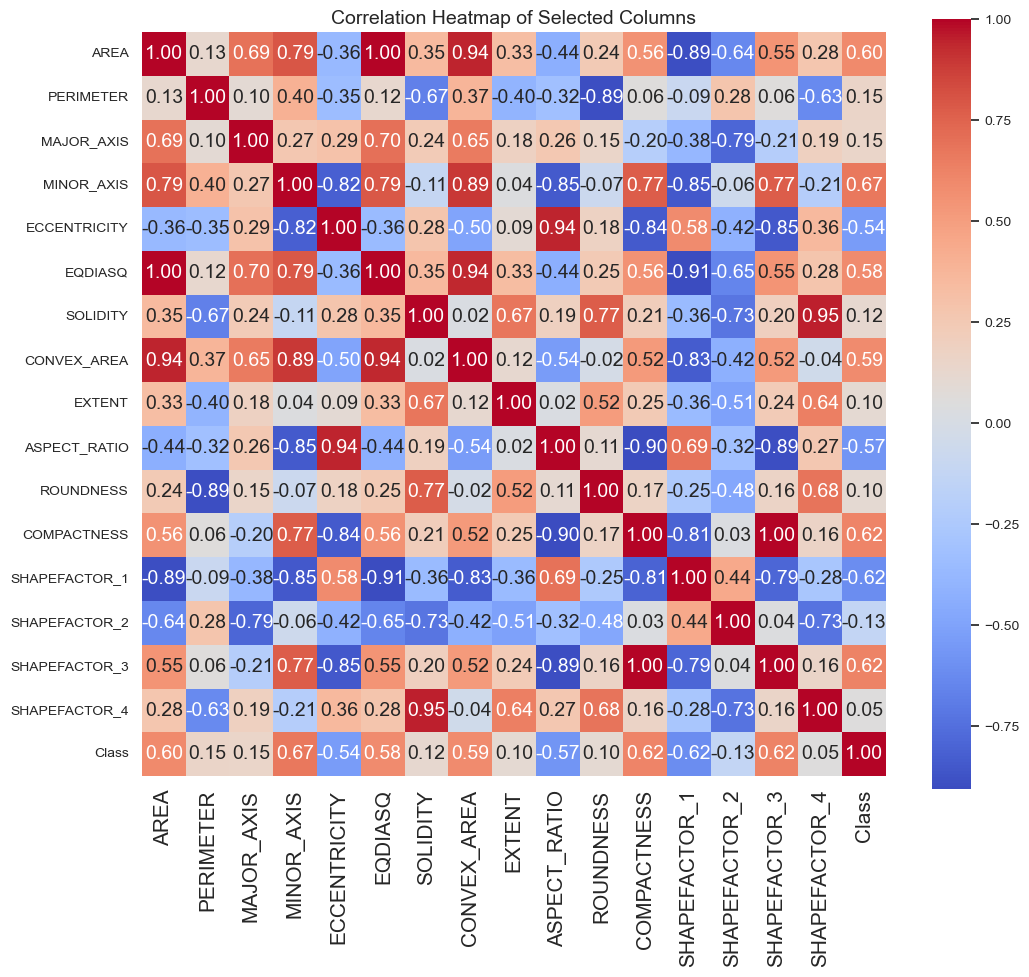

In [876]:
#the correlation between all the numerical variables
attributes = ["AREA", "PERIMETER", "MAJOR_AXIS",
              "MINOR_AXIS","ECCENTRICITY","EQDIASQ",'SOLIDITY','CONVEX_AREA','EXTENT','ASPECT_RATIO','ROUNDNESS','COMPACTNESS','SHAPEFACTOR_1','SHAPEFACTOR_2','SHAPEFACTOR_3','SHAPEFACTOR_4','Class']
subset_data = data[attributes]


correlation_matrix = subset_data.corr()


plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Selected Columns')
plt.show()

The matrix above shows the correlation between features.

### Checking missing values


In [877]:
#to check missing values in each comlumn
data.isna().sum()

AREA             0
PERIMETER        0
MAJOR_AXIS       0
MINOR_AXIS       0
ECCENTRICITY     0
EQDIASQ          0
SOLIDITY         0
CONVEX_AREA      0
EXTENT           0
ASPECT_RATIO     0
ROUNDNESS        0
COMPACTNESS      0
SHAPEFACTOR_1    0
SHAPEFACTOR_2    0
SHAPEFACTOR_3    0
SHAPEFACTOR_4    0
Class            0
dtype: int64

# Scaling 


In [945]:

# Select the columns to be scaled
cols_to_scale =  ["AREA", "PERIMETER", "MAJOR_AXIS",
              "MINOR_AXIS","ECCENTRICITY","EQDIASQ",'SOLIDITY','CONVEX_AREA','EXTENT','ASPECT_RATIO','ROUNDNESS','COMPACTNESS','SHAPEFACTOR_1','SHAPEFACTOR_2','SHAPEFACTOR_3','SHAPEFACTOR_4','Class']
print(data[cols_to_scale])    #before scaling
# Create a MinMaxScaler object
scaler = MinMaxScaler(feature_range=(0,1))
 
## Transform the selected columns using the scaler
data.loc[:,cols_to_scale] = scaler.fit_transform(data.loc[:,cols_to_scale].values)
data[cols_to_scale]   #after scaling (0_1)

          AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0     0.459650   0.159986    0.564764    0.337492      0.828837  0.544481   
1     0.631253   0.165983    0.648080    0.474660      0.752664  0.702707   
2     0.330648   0.074565    0.305761    0.303025      0.762866  0.413603   
3     0.527909   0.306403    0.678620    0.351468      0.851734  0.609328   
4     0.706868   0.260618    0.907714    0.453180      0.846747  0.767840   
...        ...        ...         ...         ...           ...       ...   
1713  0.379639   0.639580    0.450947    0.335166      0.792564  0.464722   
1714  0.414448   0.307323    0.605089    0.287516      0.874178  0.499956   
1715  0.641847   0.270037    0.502006    0.546267      0.617774  0.711985   
1716  0.460085   0.238036    0.689132    0.299774      0.886647  0.544903   
1717  0.519873   0.245966    0.607632    0.423954      0.778055  0.601834   

      SOLIDITY  CONVEX_AREA    EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  \
0     0.459650   0.159986    0.564764    0.337492      0.828837  0.544481   
1     0.631253   0.165983    0.648080    0.474660      0.752664  0.702707   
2     0.330648   0.074565    0.305761    0.303025      0.762866  0.413603   
3     0.527909   0.306403    0.678620    0.351468      0.851734  0.609328   
4     0.706868   0.260618    0.907714    0.453180      0.846747  0.767840   
...        ...        ...         ...         ...           ...       ...   
1713  0.379639   0.639580    0.450947    0.335166      0.792564  0.464722   
1714  0.414448   0.307323    0.605089    0.287516      0.874178  0.499956   
1715  0.641847   0.270037    0.502006    0.546267      0.617774  0.711985   
1716  0.460085   0.238036    0.689132    0.299774      0.886647  0.544903   
1717  0.519873   0.245966    0.607632    0.423954      0.778055  0.601834   

      SOLIDITY  CONVEX_AREA    EXTENT  ASPECT_RATIO  ROUNDNESS  COMPACTNESS  \
0     0.870548     0.419322  0.874364      0.453173   0.709463     0.542821   
1     0.923852     0.578181  0.842319      0.346703   0.863918     0.651842   
2     0.880619     0.279926  0.760682      0.358896   0.807878     0.620076   
3     0.873741     0.490211  0.838250      0.493800   0.481741     0.522745   
4     0.901253     0.666522  0.802645      0.484356   0.688103     0.516137   
...        ...          ...       ...           ...        ...          ...   
1713  0.760501     0.371461  0.425483      0.397759   0.148369     0.546887   
1714  0.849914     0.378463  0.556205      0.539096   0.406178     0.458450   
1715  0.943748     0.580815  0.795524      0.223785   0.621383     0.798729   
1716  0.858757     0.423924  0.526195      0.567167   0.543179     0.443710   
1717  0.846966     0.492041  0.699135      0.378042   0.575563     0.572554   

      SHAPEFACTOR_1  SHAPEFACTOR_2  SHAPEFACTOR_3  SHAPEFACTOR_4  Class  
0          0.230769       0.206897       0.470255       0.913893    0.0  
1          0.131868       0.137931       0.585458       0.950343    1.0  
2          0.252747       0.344828       0.551086       0.894612    0.0  
3          0.208791       0.137931       0.449858       0.951664    0.0  
4          0.153846       0.068966       0.443059       0.909667    0.0  
...             ...            ...            ...            ...    ...  
1713       0.263736       0.310345       0.474410       0.790544    0.0  
1714       0.285714       0.206897       0.385836       0.862388    0.0  
1715       0.087912       0.206897       0.751653       0.984152    1.0  
1716       0.263736       0.137931       0.371483       0.879028    0.0  
1717       0.186813       0.206897       0.501039       0.812995    1.0  

[1718 rows x 17 columns]

### - Spliting Data into Test set and Train Set

###### In this step data will be split into three parts: test set, train set and validation set:

In [949]:

split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split(data,data['Class']):
    train_set=data.iloc[train_index]
    test_set=data.iloc[test_index]
print("train set size = "+str(len(train_set)))
print("test set size = "+str(len(test_set)))    


train set size = 1374
test set size = 344


In [950]:
split = StratifiedShuffleSplit(n_splits=1,test_size=0.2,random_state=42)
for train_index,test_index in split.split( train_set, train_set['Class']):
    train_set1=train_set.iloc[train_index]
    val_set=train_set.iloc[test_index]
print("train set size = "+str(len(train_set1)))
print("validation set size = "+str(len(val_set))) 

train set size = 1099
validation set size = 275


#### to make sure that the data is split almost equally between the test, train and the validation sets :

In [951]:
test_set[["Class"]].value_counts() / len(test_set)

Class
0.0      0.581395
1.0      0.418605
dtype: float64

In [952]:
train_set1[["Class"]].value_counts() / len(train_set1)

Class
0.0      0.580528
1.0      0.419472
dtype: float64

In [953]:
val_set[["Class"]].value_counts() / len(val_set)

Class
0.0      0.581818
1.0      0.418182
dtype: float64

## - Seperate Labels From Original Data

In [954]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data, test_size=0.2, random_state=42)
X_train1=X_train.drop("Class",axis=1)
X_test1=X_test.drop("Class",axis=1)
Y_train =X_train["Class"].copy()
Y_test=X_test["Class"].copy()
X_val = val_set.drop("Class",axis=1)
Y_val = val_set["Class"].copy()

### - Training and Selecting a model

First, we use different classification algorithms to see which one gives the best performance using the accuracy mertic:

In [955]:
Predict=np.ones(Y_train.shape)
accuracy_score(Y_train,Predict)

0.41994177583697234

## 1_Logistic Regression

In [957]:

log_reg = LogisticRegression(random_state=42,max_iter=10000)
log_reg.fit(X_train1, Y_train)
cross_val_score(log_reg,X_train1, Y_train, cv=3, scoring="accuracy")


array([0.86244541, 0.85152838, 0.8580786 ])

In [958]:
rand_predict=log_reg.predict(X_test1)
rand_accuracy=accuracy_score(Y_test, rand_predict)
rand_accuracy

0.8808139534883721

## 2_Building a Decision tree  model


In [959]:
# Create Decision Tree classifer object

Dec_clf = DecisionTreeClassifier(random_state=42,min_samples_split=50,max_leaf_nodes=60)

# Train Decision Tree Classifer

Dec_clf = Dec_clf.fit(X_train1, Y_train)


In [961]:

cross_val_score(Dec_clf,X_train1, Y_train,cv=3,scoring='accuracy')


array([0.82969432, 0.84934498, 0.85152838])

In [962]:
Dec_predict=Dec_clf.predict(X_test1)
from sklearn.metrics import accuracy_score
Dec_accuracy=accuracy_score( Y_test, Dec_predict)
Dec_accuracy

0.8372093023255814

## Plot a decision tree , please ZOOM in to read it

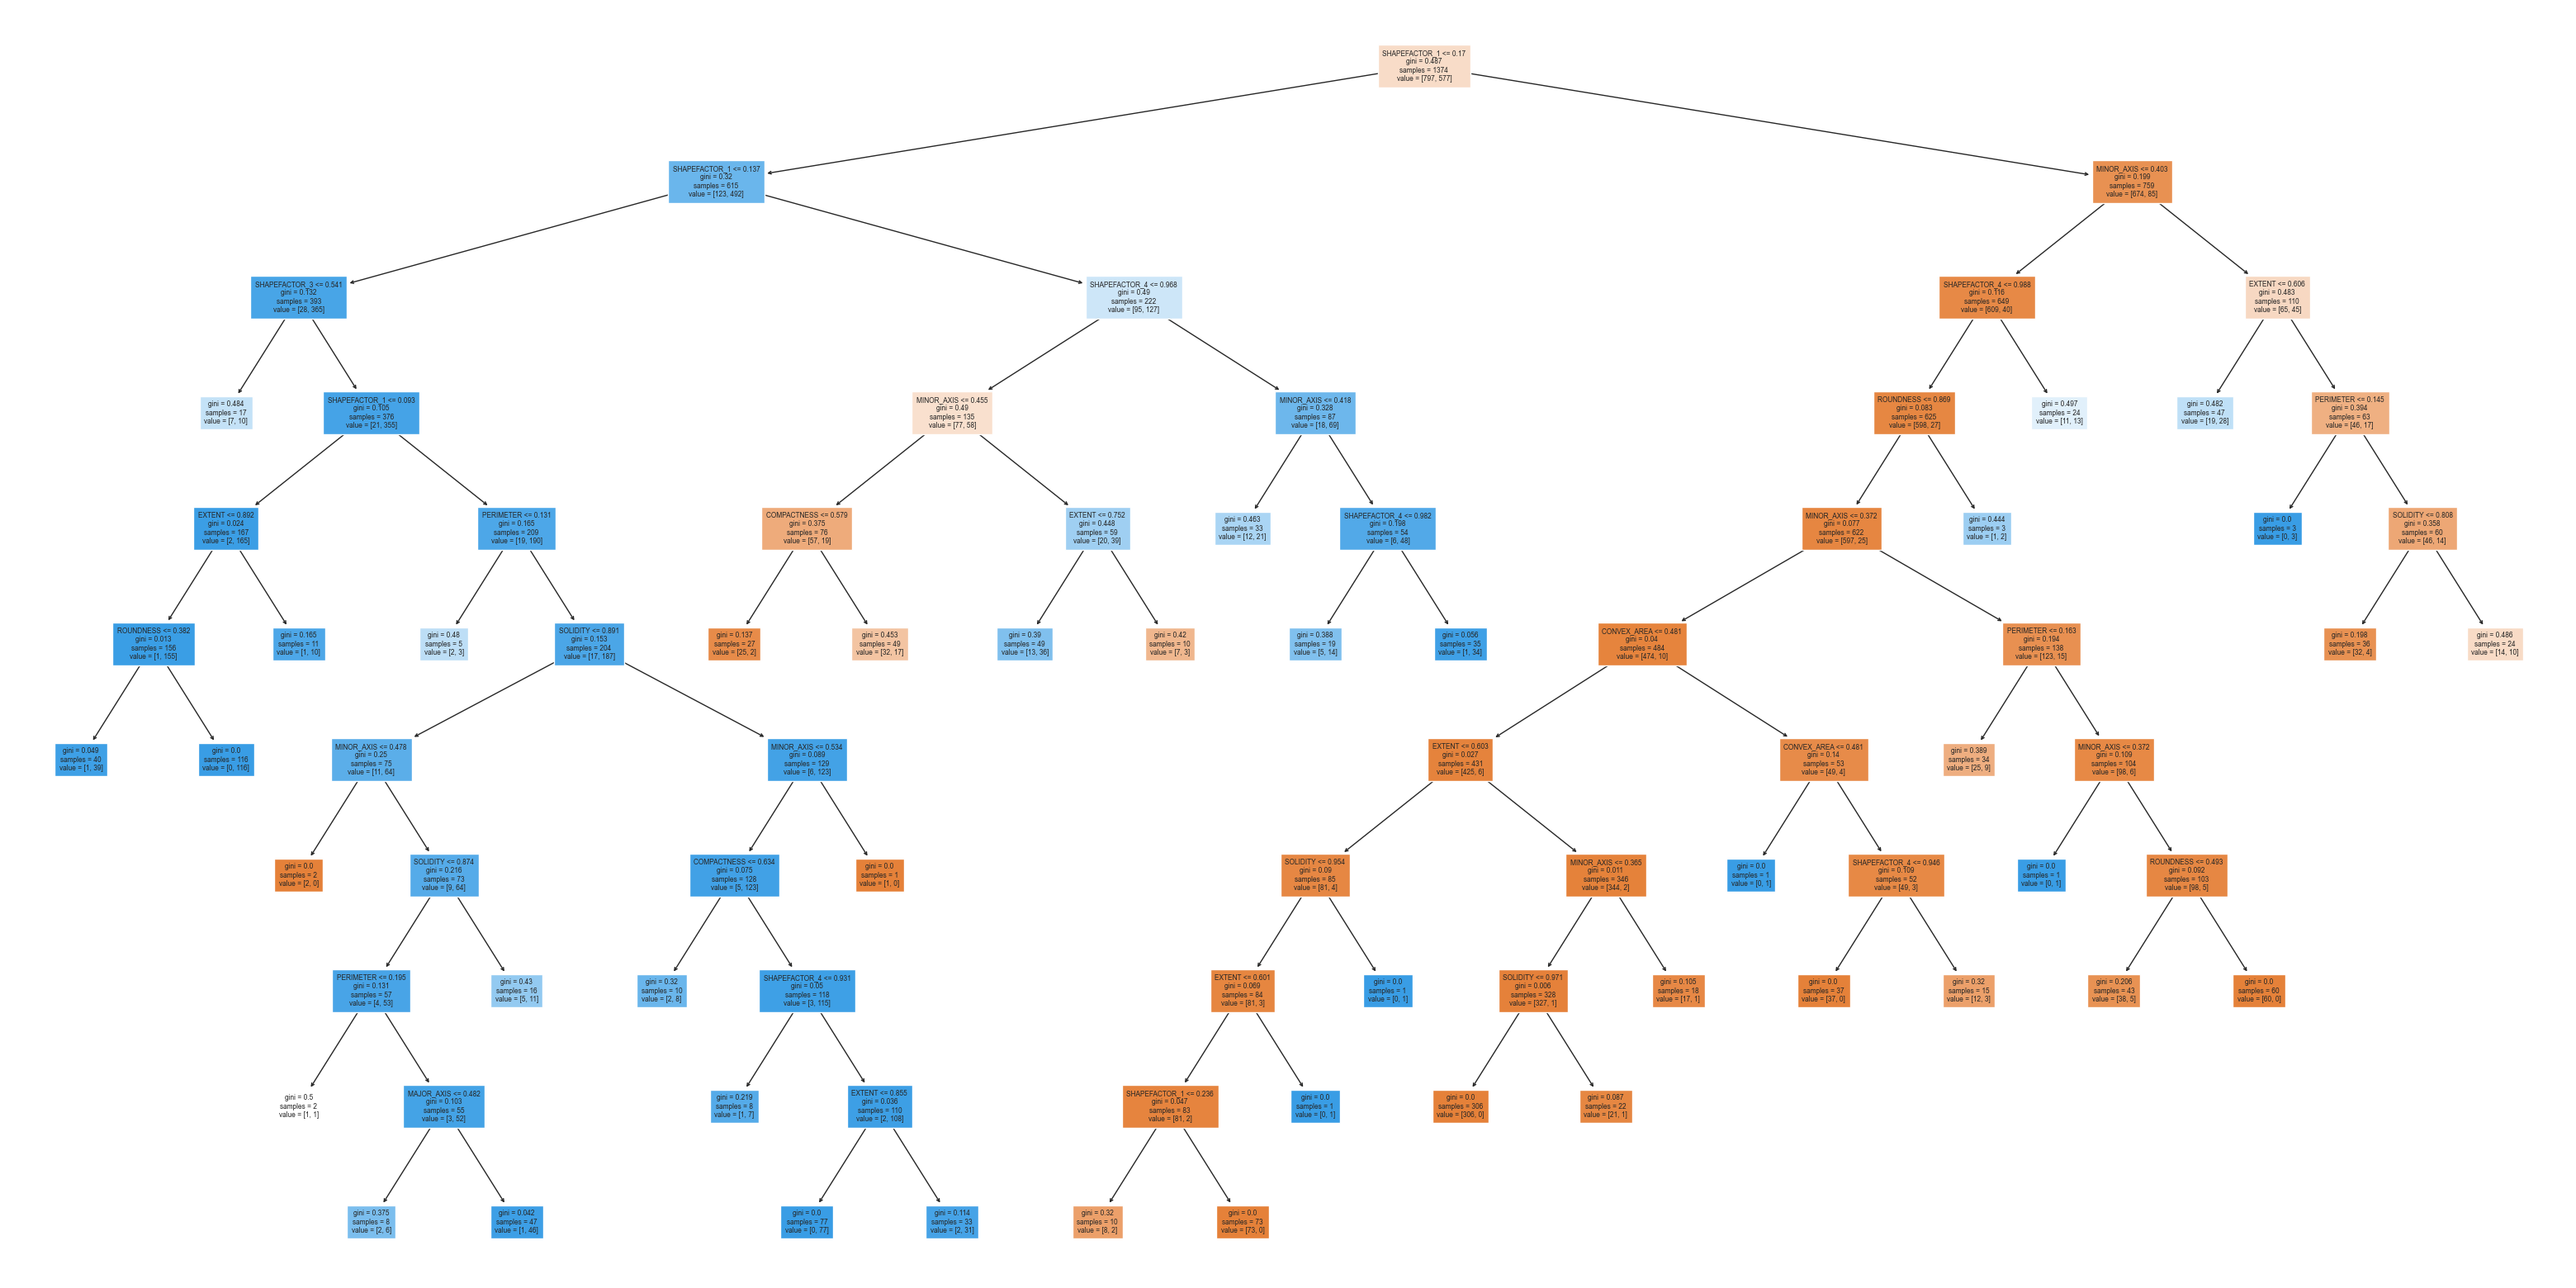

In [963]:
from sklearn import tree 
plt.figure(figsize=(40,20))
tree.plot_tree(Dec_clf,feature_names=data.columns.tolist(),filled=True,fontsize=6)
plt.show()

## 3_SVC

In [964]:
svc_clf = SVC(gamma="auto", random_state=42)
svc_clf.fit(X_train1, Y_train) # y_train, not y_train_5
svc_predict=svc_clf.predict(X_test1)
cross_val_score(svc_clf,X_train1,Y_train,cv=3,scoring='accuracy') 
 

array([0.85371179, 0.84716157, 0.8558952 ])

In [965]:
svr_accuracy=accuracy_score(Y_test,svc_predict)
svr_accuracy

0.8837209302325582

## 4_Random Forest Classifiers

In [967]:

rf_clf = ensemble. RandomForestClassifier(n_estimators=300, min_samples_split=5, min_samples_leaf=4)

rf_clf=rf_clf.fit( X_train1, Y_train) 
cross_val_score(rf_clf,X_train1, Y_train, cv=3)

array([0.85152838, 0.84716157, 0.86899563])

In [968]:
rand_predict=rf_clf.predict(X_test1)
rand_accuracy=accuracy_score(  Y_test, rand_predict)
rand_accuracy

0.8662790697674418

## 5_SGD Classifier

In [970]:

sgd_clf=SGDClassifier(random_state=42,alpha=.01)
sgd_clf=sgd_clf.fit(X_train1, Y_train)
 
cross_val_score(sgd_clf,X_train1, Y_train,cv=3,scoring='accuracy')

array([0.84934498, 0.8558952 , 0.85371179])

In [971]:
sgd_predict = sgd_clf.predict(X_test1)
sgd_accuracy=accuracy_score(Y_test,sgd_predict)
sgd_accuracy

0.8895348837209303

## 6_Nearest Neigbours classifier

In [972]:
# from sklearn.neighbors import KNeighborsClassifier
Knn_clf=KNeighborsClassifier(leaf_size=60)
Knn_clf.fit(X_train1, Y_train)

KNeighborsClassifier(leaf_size=60)

In [973]:
cross_val_score(Knn_clf,X_train1.values, Y_train,cv=3,scoring='accuracy')

array([0.83406114, 0.87336245, 0.87554585])

In [974]:
KNN_predict=Knn_clf.predict(X_test1.values)
knn_accuracy=accuracy_score(Y_test,KNN_predict)
knn_accuracy

C:\Users\NOR0185869\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.8633720930232558

## Naive bayes 

In [975]:
gnb_clf = GaussianNB()
gnb_clf.fit(X_train1, Y_train)
gnb_scores=cross_val_score(gnb_clf, X_train1, Y_train, cv=3, scoring="accuracy")
gnb_scores

array([0.86899563, 0.8558952 , 0.86244541])

In [976]:
gnb_predict=gnb_clf.predict(X_test1)
gnb_accuracy=accuracy_score(Y_test,gnb_predict)
gnb_accuracy

0.872093023255814

### -Using MLPs Classifier 

In [983]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=1000,
                        random_state=42)
mlp_clf.fit( X_train1, Y_train)
mlp_accuracy =mlp_clf.score(X_val, Y_val)
mlp_accuracy

0.8836363636363637

## Dummy classifier


In [984]:

clf_dummy = DummyClassifier(random_state=42) 
#establishing random_state for reproducibility
clf_dummy.fit(X_train1, Y_train)
dummy_predict = clf_dummy.predict(X_test1)
accuracy_score(Y_test, dummy_predict) 

0.5843023255813954

In [985]:
print('ACCURACY')
print('Accuracy of Logistic Regession is',rand_accuracy)
print('Accuracy of tree model is',Dec_accuracy)
print('Accuracy of SVM is',svr_accuracy)
print('Accuracy of RF is',rand_accuracy)
print('Accuracy of SGD is',sgd_accuracy)
print('Accuracy of KNN is',knn_accuracy)
print('Accuracy of MLP is',mlp_accuracy)


ACCURACY
Accuracy of Logistic Regession is 0.8662790697674418
Accuracy of tree model is 0.8372093023255814
Accuracy of SVM is 0.8837209302325582
Accuracy of RF is 0.8662790697674418
Accuracy of SGD is 0.8895348837209303
Accuracy of KNN is 0.8633720930232558
Accuracy of MLP is 0.8836363636363637


#### we want to do grid search on the best model(SGD Classifier) to find best estimater

In [986]:
# # Create grid parameters for hyperparameter tuning
from sklearn.model_selection import GridSearchCV
param_grid = {
    'loss':['hinge', 'log_loss', 'squared_error'],
    'alpha': [0.0001, 0.001, 0.01, 0.1],
    'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0]}
    
grid_search = GridSearchCV(sgd_clf, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train1.values, Y_train)


GridSearchCV(cv=3, estimator=SGDClassifier(alpha=0.01, random_state=42),
             n_jobs=-1,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'l1_ratio': [0.0, 0.25, 0.5, 0.75, 1.0],
                         'loss': ['hinge', 'log_loss', 'squared_error']},
             scoring='accuracy')

In [987]:

# best_model
best_params = grid_search.best_params_
best_params

{'alpha': 0.001, 'l1_ratio': 0.0, 'loss': 'hinge'}

In [988]:

best_score = grid_search.best_score_
best_score

0.8646288209606986

In [989]:
best_model = grid_search.best_estimator_
best_model

SGDClassifier(alpha=0.001, l1_ratio=0.0, random_state=42)

In [990]:
test_accuracy = best_model.score(X_test1.values, Y_test)
test_accuracy

0.8837209302325582

# performance measures

now we want to test classification algorithms by different ways

In [991]:
scores = cross_val_predict(sgd_clf, X_train1, Y_train, cv=3)


In [992]:
confusion_matrix(Y_test,sgd_predict)

array([[181,  20],
       [ 18, 125]], dtype=int64)

## *Precision and Recall

In [993]:
from sklearn.metrics import precision_recall_curve
decision_values = sgd_clf.decision_function(X_test1)
precision, recall, thresholds = precision_recall_curve(Y_test, decision_values)

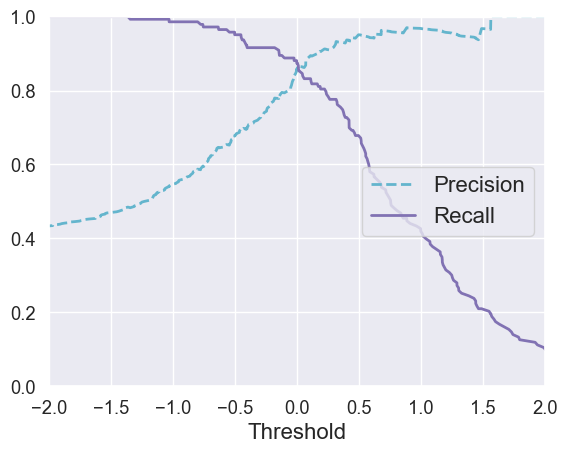

In [994]:
def plot_precision_recall_vs_threshold(precision, recals, thresholds):
    plt.plot(thresholds, precision[:-1], "c--", label="Precision", linewidth=2)
    plt.plot(thresholds, recall[:-1], "m-", label="Recall", linewidth=2)
    plt.legend(loc="center right", fontsize=16) 
    plt.xlabel("Threshold", fontsize=16)        
    plt.grid(True)                             
    plt.axis([-2,2, 0, 1])           
plot_precision_recall_vs_threshold(precision, recall, thresholds)

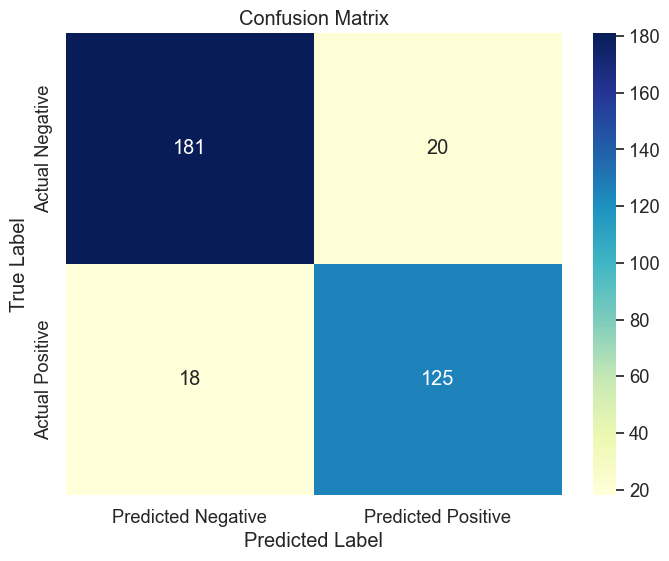

In [995]:
from sklearn.metrics import ConfusionMatrixDisplay
import seaborn as sns
conf_matrix = confusion_matrix(Y_test, sgd_predict)
plt.figure(figsize=(8, 6))
sns.set(font_scale=1.2)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=["Predicted Negative", "Predicted Positive"],
            yticklabels=["Actual Negative", "Actual Positive"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


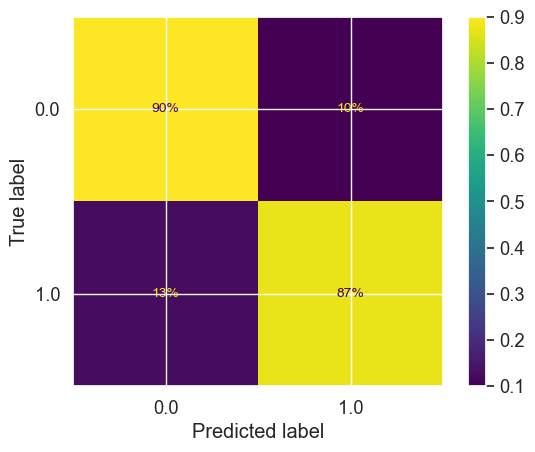

In [996]:
plt.rc('font', size=10) 
ConfusionMatrixDisplay.from_predictions(Y_test,sgd_predict,
                                        normalize="true", values_format=".0%")
plt.show()

## *F1 Score 

In [997]:
from sklearn.metrics import f1_score

f1_score(Y_test,sgd_predict )

0.8680555555555555

### Now , we want to  evaluate the best model that we selscted on the test data and calculate the accuracy of the model.

In [998]:
model=best_model.predict(X_test1.values)

In [999]:
accuracy_score(Y_test,model)

0.8837209302325582

In [1000]:
from sklearn.metrics import precision_score
precision_score(Y_test,model)

0.9186991869918699

In [1001]:
from sklearn.metrics import recall_score
recall_score( Y_test,model)

0.7902097902097902

In [1002]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_test, model)

array([[191,  10],
       [ 30, 113]], dtype=int64)

# Neural Network

### - Import Needed Libararies

In [1003]:
import tensorflow as tf
from tensorflow import keras

### - Get and Prepare the Dataset

We already have read the data and prepared it by splitting it into test, train, and validation sets.

### - Build the Model

In [1004]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, Nadam, Adagrad, SGD

def build_model(optimizer):
    tf.keras.backend.clear_session()
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train1.shape[1],)),
        Dense(32, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model

optimizers = [Adam(learning_rate=0.001), RMSprop(learning_rate=0.001), Nadam(learning_rate=0.001), Adagrad(learning_rate=0.01), SGD(learning_rate=0.01)]

histories = []

for optimizer in optimizers:
    tf.keras.backend.clear_session()
    model = build_model(optimizer)
    history = model.fit(X_train1, Y_train, epochs=30, batch_size=32, verbose=0, validation_data=(X_test1, Y_test))
    accuracy = history.history['val_accuracy'][-1]  # Get final validation accuracy from history
    histories.append((optimizer.__class__.__name__, history))
    print(f"Optimizer: {optimizer.__class__.__name__}, Accuracy: {accuracy:.4f}")

Optimizer: Adam, Accuracy: 0.8750
Optimizer: RMSprop, Accuracy: 0.8837
Optimizer: Nadam, Accuracy: 0.8692
Optimizer: Adagrad, Accuracy: 0.8779
Optimizer: SGD, Accuracy: 0.8750


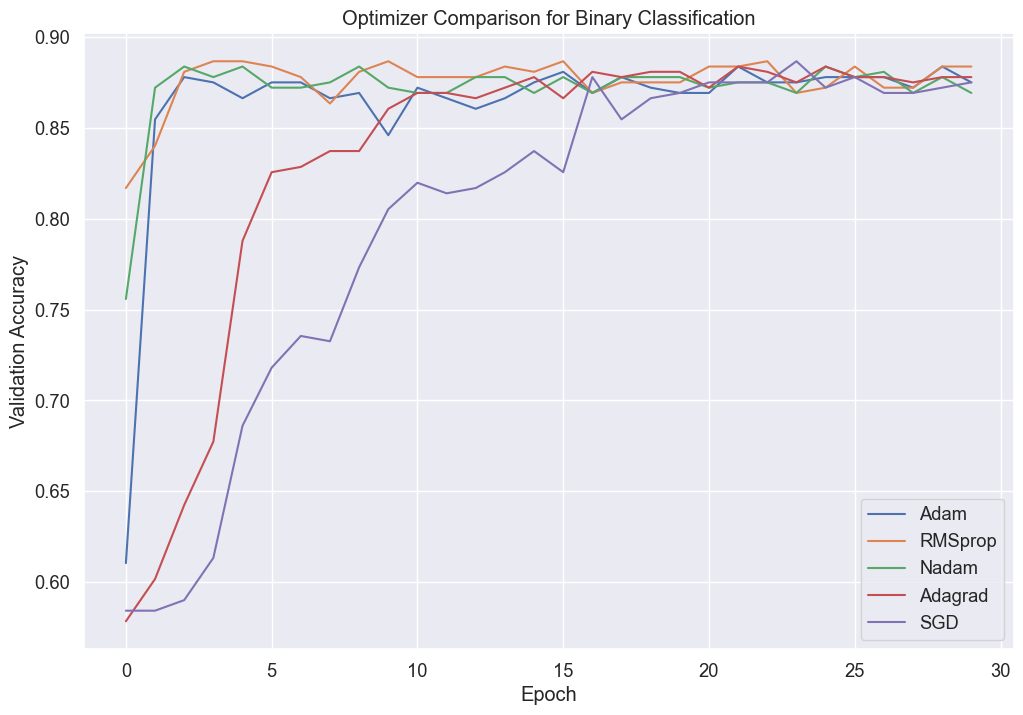

In [1005]:
plt.figure(figsize=(12, 8))

for name, history in histories:
    plt.plot(history.history['val_accuracy'], label=name)

plt.title('Optimizer Comparison for Binary Classification')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.show()

In [1006]:
len(X_train1)

1374

We are using neural network of one input layer, 3 middle layers and output layer.

In [1007]:
tf.keras.backend.clear_session()#this code is for when rerun the code it will not create a new dense layers
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(100,activation="relu",input_dim = 16))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(25, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))

In [1008]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               1700      
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 dense_2 (Dense)             (None, 25)                1275      
                                                                 
 dense_3 (Dense)             (None, 10)                260       
                                                                 
 dense_4 (Dense)             (None, 1)                 11        
                                                                 
Total params: 8296 (32.41 KB)
Trainable params: 8296 (32.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [1009]:

tf.keras.utils.plot_model(model, "data.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [1010]:
model.layers

In [1011]:
hidden0 = model.layers[0]
hidden1 = model.layers[1]
hidden2 = model.layers[2]
print(hidden0.name)
print(hidden1.name)
print(hidden2.name)

dense
dense_1
dense_2


In [1012]:
print(model.get_layer('dense') is hidden0)
print(model.get_layer('dense_1') is hidden1)
print(model.get_layer('dense_2') is hidden2)

True
True
True


In [1013]:
weights, biases = hidden1.get_weights()
weights

array([[-0.02905741, -0.02269034,  0.11214809, ...,  0.08812623,
        -0.11917119, -0.18652038],
       [ 0.0987208 , -0.17147756,  0.07206626, ...,  0.06972866,
         0.10132028, -0.04956117],
       [-0.03299876, -0.17700163, -0.07069096, ...,  0.03390536,
         0.1590857 , -0.11706429],
       ...,
       [-0.1685677 ,  0.17992215,  0.03110738, ..., -0.02714491,
         0.11249499,  0.01400915],
       [-0.19912481,  0.13218184,  0.12546964, ..., -0.08831777,
        -0.04599619,  0.04624233],
       [ 0.15019904,  0.00611997, -0.08218503, ..., -0.11807632,
        -0.01749063, -0.10183544]], dtype=float32)

### - Compile the Model

In [1014]:

model.compile(loss="binary_crossentropy",optimizer="SGD", metrics=["accuracy"])


### - Training the model

In [1015]:
model_history = model.fit(X_train1, Y_train, epochs=30, validation_data=(X_val, Y_val))


Epoch 1/30
43/43 [==============================] - 1s 6ms/step - loss: 0.6719 - accuracy: 0.6929 - val_loss: 0.6612 - val_accuracy: 0.5855
Epoch 2/30
43/43 [==============================] - 0s 3ms/step - loss: 0.6562 - accuracy: 0.6004 - val_loss: 0.6475 - val_accuracy: 0.5927
Epoch 3/30
43/43 [==============================] - 0s 3ms/step - loss: 0.6442 - accuracy: 0.6172 - val_loss: 0.6346 - val_accuracy: 0.6436
Epoch 4/30
43/43 [==============================] - 0s 4ms/step - loss: 0.6314 - accuracy: 0.6732 - val_loss: 0.6214 - val_accuracy: 0.6582
Epoch 5/30
43/43 [==============================] - 0s 3ms/step - loss: 0.6185 - accuracy: 0.6878 - val_loss: 0.6073 - val_accuracy: 0.7418
Epoch 6/30
43/43 [==============================] - 0s 3ms/step - loss: 0.6050 - accuracy: 0.7256 - val_loss: 0.5915 - val_accuracy: 0.7891
Epoch 7/30
43/43 [==============================] - 0s 3ms/step - loss: 0.5888 - accuracy: 0.7635 - val_loss: 0.5724 - val_accuracy: 0.7855
Epoch 8/30
43/43 [==

In [1016]:

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


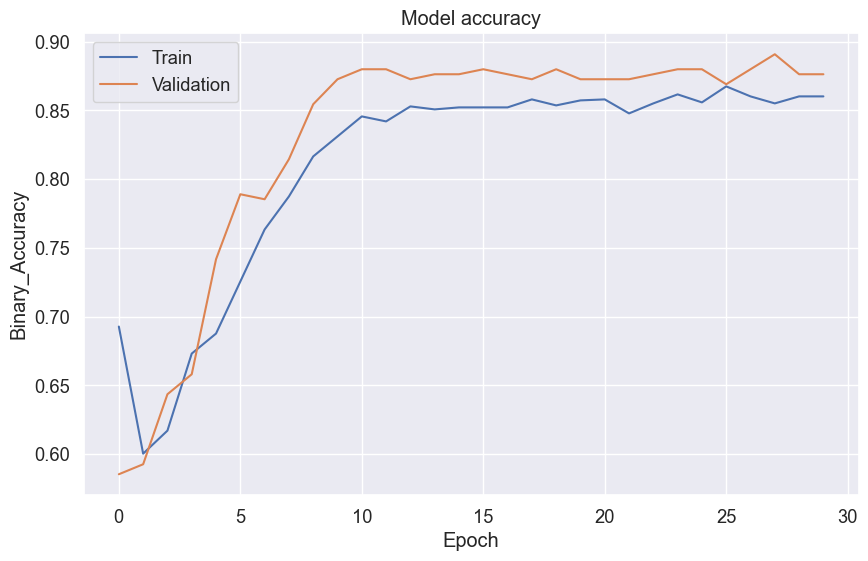

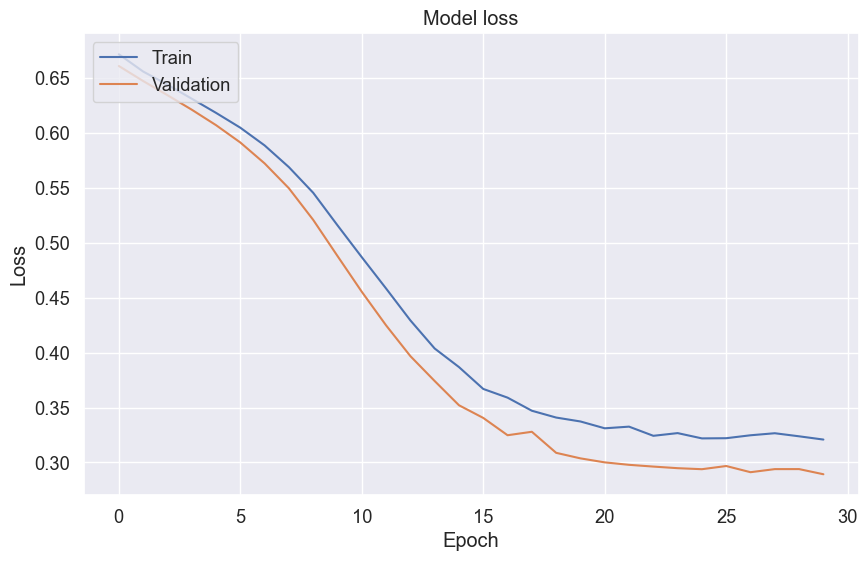

In [1017]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot training & validation accuracy values
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Binary_Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.figure(figsize=(10, 6))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [1018]:
model_history.params

{'verbose': 1, 'epochs': 30, 'steps': 43}

In [1019]:
print(model_history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [1020]:

evaluation = model.evaluate(X_test1, Y_test)
print("Test Loss:", evaluation[0])
print("Test Accuracy:", evaluation[1])

11/11 [==============================] - 0s 2ms/step - loss: 0.3135 - accuracy: 0.8779
Test Loss: 0.31346631050109863
Test Accuracy: 0.8779069781303406


### Fine Tune

In [1040]:
#tring more than hyper parameters to get the best for best model
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras_tuner import HyperParameters
import keras_tuner as kt
def model_builder(hyper_P):
    model = keras.Sequential()
    hyper_P_u1 = hyper_P.Int('u1', min_value=10, max_value=150)
    model.add(layers.Dense(units=hyper_P_u1, input_dim=16))
    hyper_P_u2 =  hyper_P.Int('u2', min_value=80, max_value=150)
    model.add(layers.Dense(units=hyper_P_u2))
    hyper_P_u3 =  hyper_P.Int('u3', min_value=40, max_value=80)
    model.add(layers.Dense(units=hyper_P_u3))
    hyper_P_u4 =  hyper_P.Int('u4', min_value=20, max_value=40)
    model.add(layers.Dense(units=hyper_P_u4))
    model.add(layers.Dense(1, activation='sigmoid'))
    learning_rate =  hyper_P.Choice('learning_rate', values=[0.01, 0.001, 0.0001])
    clip_norm =  hyper_P.Choice('clipnorm', values=[10, 20, 30])
    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate, clipnorm=clip_norm, ema_momentum=0.9)
    model.compile(loss='binary_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

In [1041]:
save_model=keras.callbacks.ModelCheckpoint('model.h5',save_best_only=True)
early_stopping=tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=10)

In [1042]:

tuner=kt.Hyperband(model_builder,objective='val_accuracy',max_epochs=15)
tuner.search(X_train1,Y_train, epochs=30,validation_data=(X_val, Y_val),callbacks=[early_stopping])

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json


INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit


In [1043]:
best_params =tuner.get_best_hyperparameters(num_trials=1)[0]
best_units1 = best_params.get('u1')
best_units2 = best_params.get('u2')
best_units3 = best_params.get('u3')
best_units4 = best_params.get('u4')
best_learning_rate = best_params.get('learning_rate')
best_clip_norm =best_params.get('clipnorm')

print("Best First Layer Units:", best_units1)
print("Best Second Layer Units:", best_units2)
print("Best Third Layer Units:", best_units3)
print("Best Fourth Layer Units:", best_units4)
print("Best Learning Rate:", best_learning_rate)
print("Best Clip Norm:", best_clip_norm)

Best First Layer Units: 87
Best Second Layer Units: 128
Best Third Layer Units: 66
Best Fourth Layer Units: 33
Best Learning Rate: 0.0001
Best Clip Norm: 10


In [1044]:

final_model=tuner.hypermodel.build(best_params)
model_f=final_model.fit(X_train1,Y_train,epochs=30,validation_data=(X_val,Y_val),callbacks=[save_model,early_stopping])

Epoch 1/30
43/43 [==============================] - 2s 9ms/step - loss: 0.6195 - accuracy: 0.7234 - val_loss: 0.5784 - val_accuracy: 0.6473
Epoch 2/30
42/43 [============================>.] - ETA: 0s - loss: 0.5507 - accuracy: 0.7783

C:\Users\NOR0185869\AppData\Local\anaconda3\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


43/43 [==============================] - 0s 4ms/step - loss: 0.5498 - accuracy: 0.7802 - val_loss: 0.5012 - val_accuracy: 0.8691
Epoch 3/30
43/43 [==============================] - 0s 4ms/step - loss: 0.4831 - accuracy: 0.8341 - val_loss: 0.4351 - val_accuracy: 0.8618
Epoch 4/30
43/43 [==============================] - 0s 4ms/step - loss: 0.4294 - accuracy: 0.8399 - val_loss: 0.3869 - val_accuracy: 0.8618
Epoch 5/30
43/43 [==============================] - 0s 4ms/step - loss: 0.3900 - accuracy: 0.8479 - val_loss: 0.3521 - val_accuracy: 0.8691
Epoch 6/30
43/43 [==============================] - 0s 4ms/step - loss: 0.3650 - accuracy: 0.8493 - val_loss: 0.3273 - val_accuracy: 0.8691
Epoch 7/30
43/43 [==============================] - 0s 4ms/step - loss: 0.3491 - accuracy: 0.8464 - val_loss: 0.3222 - val_accuracy: 0.8764
Epoch 8/30
43/43 [==============================] - 0s 4ms/step - loss: 0.3413 - accuracy: 0.8544 - val_loss: 0.3099 - val_accuracy: 0.8655
Epoch 9/30
43/43 [=============